In [1]:
from data_loader import load_data, load_data_sample
from models import LogisticLogOddsModel
from explainers import SHAPExplainer
from util import printmd
import shap
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import sklearn
import numpy as np

In [2]:
%matplotlib inline

In [3]:
X, y, display_data = load_data()
feature_names = list(X.columns)
model = LogisticLogOddsModel()
model.load_or_train(X, y)

Loaded model: models/Logistic.model


In [4]:
X_sample, y_sample, display_data_sample = load_data_sample()
masker = shap.maskers.Independent(X_sample, max_samples=100)

In [5]:
permutation_explainer = shap.Explainer(model.predict, masker)
permutation_explainer_shap_values = permutation_explainer(X_sample)
permutation_explainer_shap_values.display_data = display_data_sample

divide by zero encountered in log
divide by zero encountered in log
Permutation explainer: 1001it [00:52, 16.02it/s]                          


In [6]:
linear_explainer = shap.Explainer(model.model, masker)
linear_explainer_shap_values = linear_explainer(X_sample)
linear_explainer_shap_values.display_data = display_data_sample

In [8]:
explanation_a = SHAPExplainer(permutation_explainer, 'testa')
explanation_a.shap_values = permutation_explainer_shap_values
explanation_b = SHAPExplainer(linear_explainer, 'testb')
explanation_b.shap_values = linear_explainer_shap_values

In [9]:
df_a = pd.DataFrame(explanation_a.shap_values.values)
df_b = pd.DataFrame(explanation_b.shap_values.values)
include_a = np.isfinite(df_a).all(1)
include_b = np.isfinite(df_b).all(1)
include = np.logical_and(include_a, include_b)
include_ids = include[include == True].index.tolist()

In [10]:
for explanation, include in ((explanation_a, include_a), (explanation_b, include_b)):
    for exclude_id in include[include == False].index:
        exclude_shap_values = explanation.shap_values[exclude_id]
        print(f'Observation #{exclude_id}:')
        print(exclude_shap_values.display_data)
        print(exclude_shap_values.values)

Observation #139:
[41.0 ' Self-emp-inc' 16.0 ' Married-civ-spouse' ' Prof-specialty'
 ' Husband' ' White' ' Male' 99999.0 0.0 70.0 ' United-States']
[ 6.53411480e-02 -2.24003415e-02  2.35351036e+00  1.10696179e-01
  7.47181069e-02  6.52678055e-01  3.38159079e-02  1.74518126e-01
  3.26063667e+01            -inf             inf  2.83380212e-02]


In [11]:
for explanation in (explanation_a, explanation_b):
    explanation.shap_values = explanation.shap_values[include_ids]

### Age

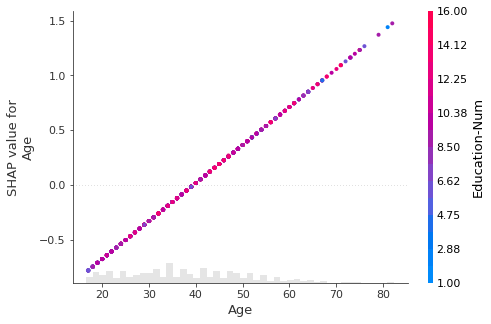

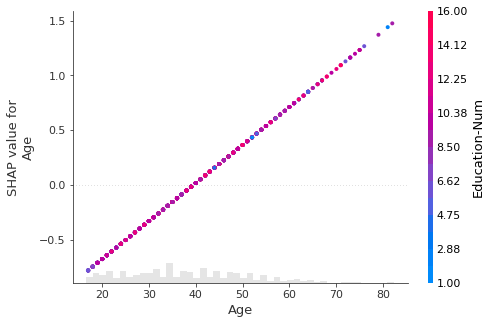

### Workclass

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


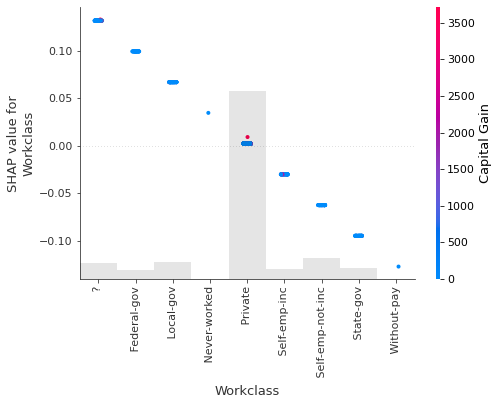

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


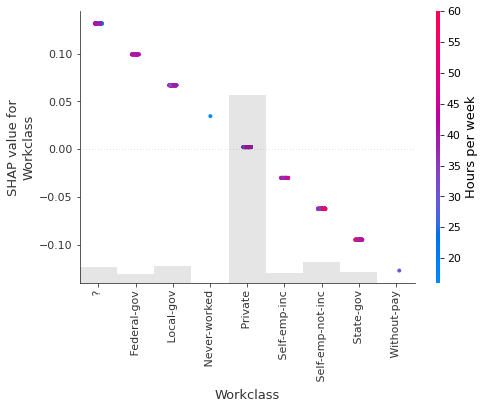

### Education-Num

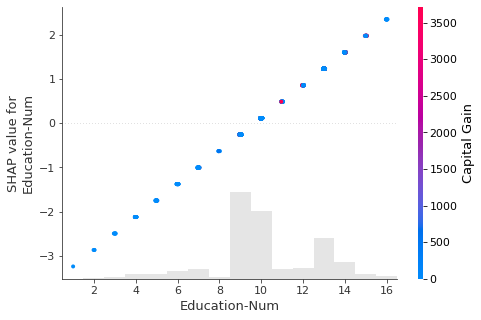

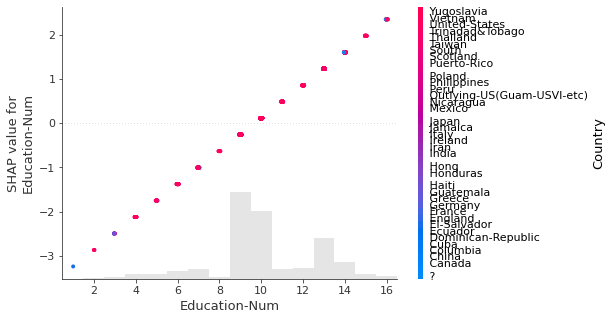

### Marital Status

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


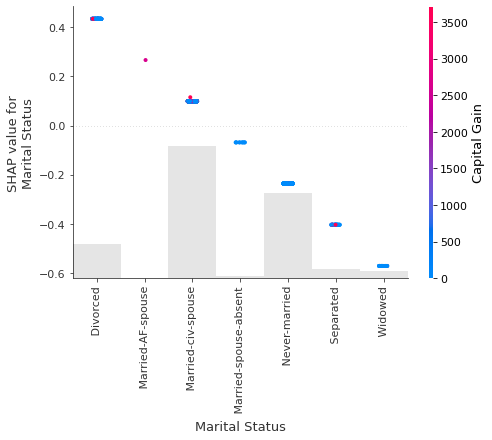

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


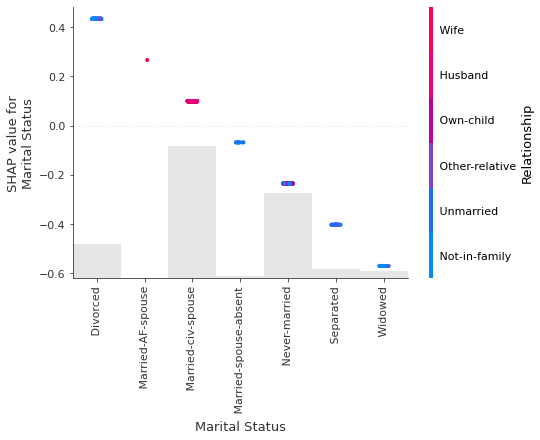

### Occupation

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


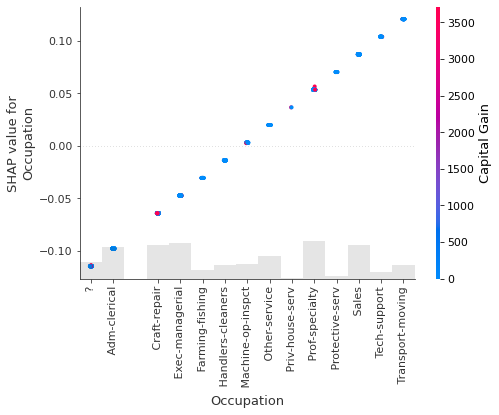

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


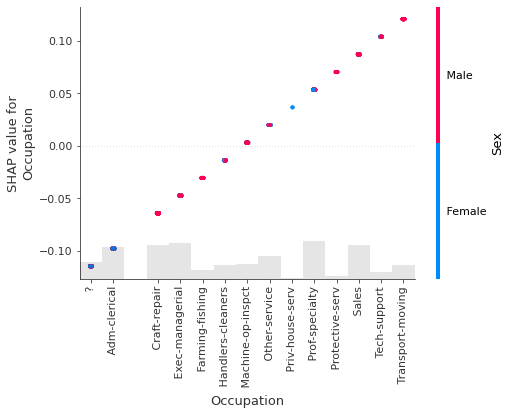

### Relationship

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


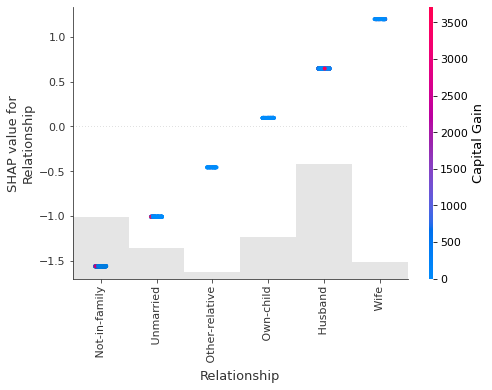

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


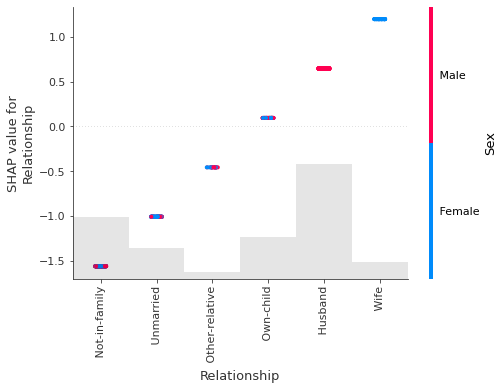

### Race

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


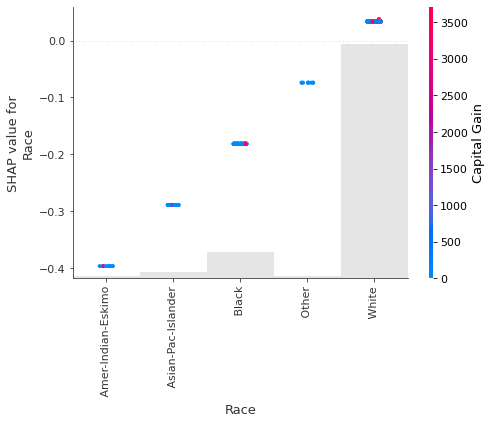

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


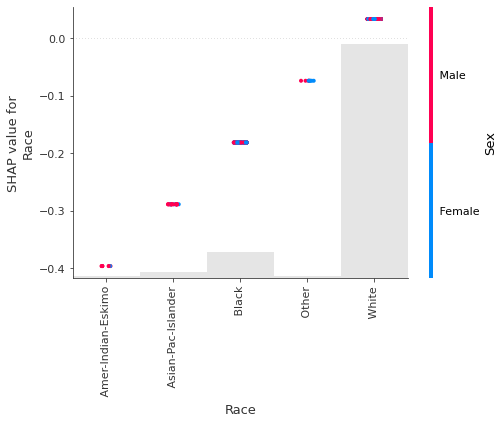

### Sex

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


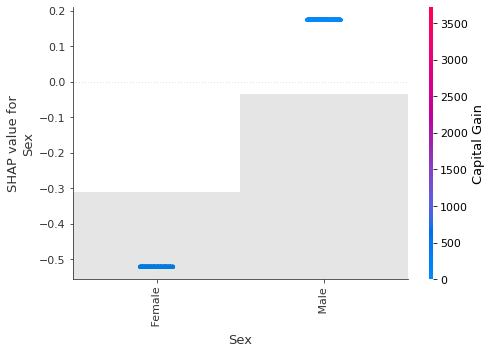

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


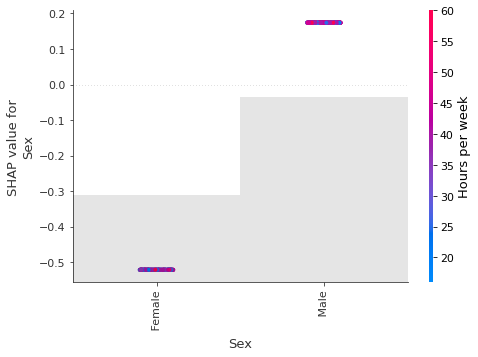

### Capital Gain

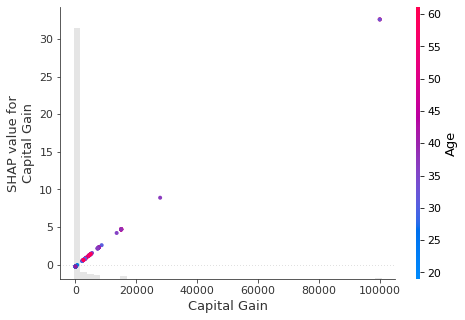

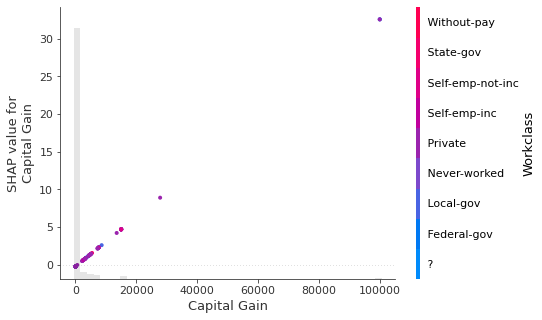

### Capital Loss

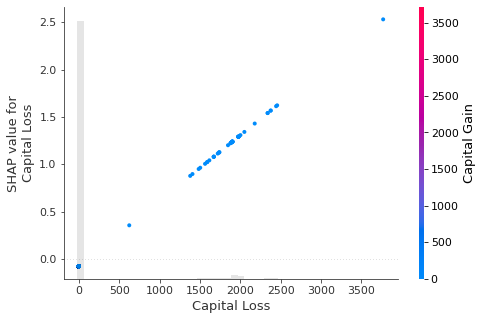

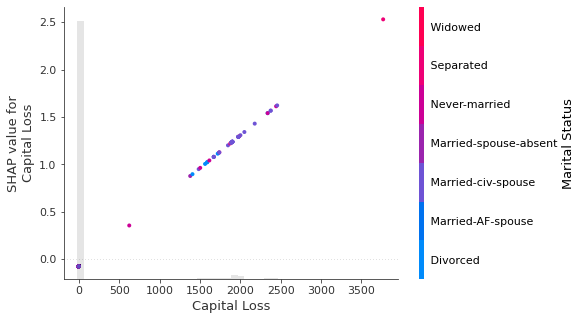

### Hours per week

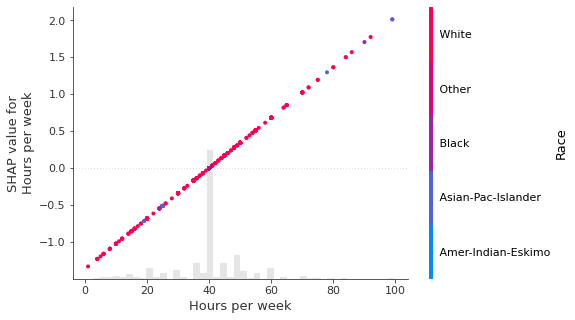

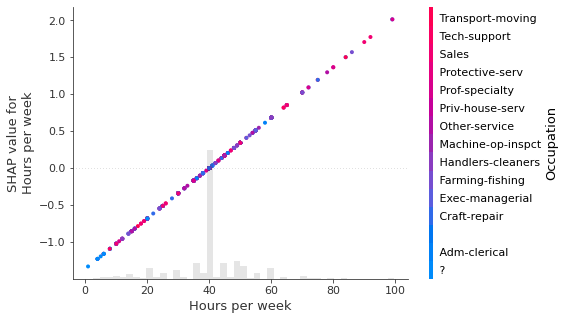

### Country

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


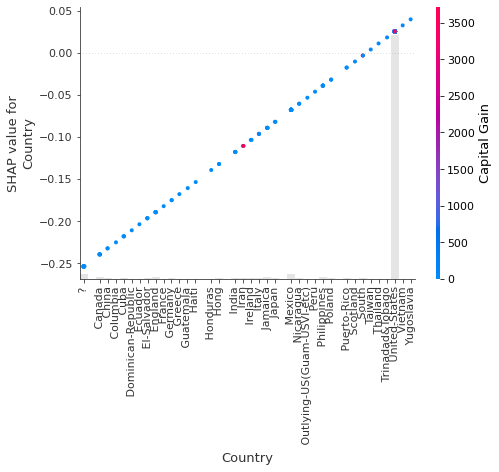

Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


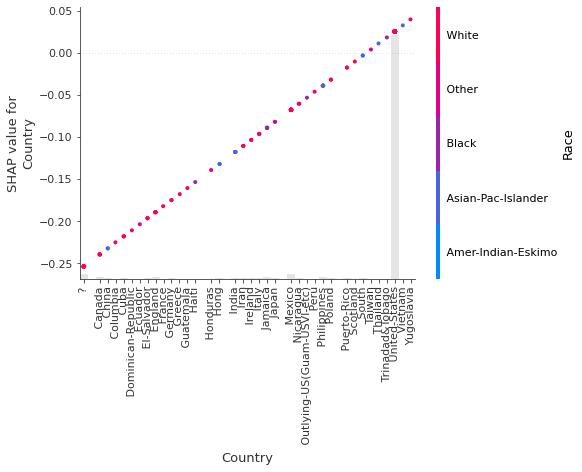

In [12]:
for feature_name in X.columns:
    printmd(f'### {feature_name}')
    for explanation in (explanation_a, explanation_b):
        shap.plots.scatter(explanation.shap_values[:,feature_name], color=explanation.shap_values)

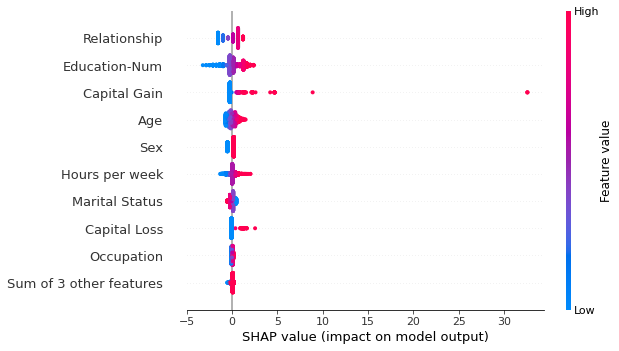

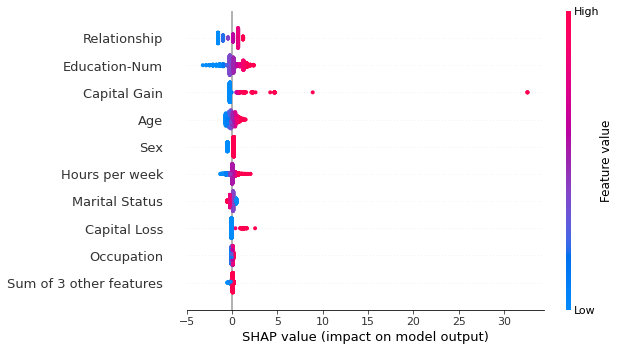

In [13]:
order = np.argsort(-explanation_b.shap_values.abs.mean(0).values)
for explanation in (explanation_a, explanation_b):
    shap.plots.beeswarm(explanation.shap_values, order=order)

In [14]:
shap.initjs()

In [15]:
plot_b = shap.plots.force(
    base_value=explanation_b.shap_values.abs.mean(0).base_values,
    shap_values=explanation_b.shap_values.values,
    features=explanation_b.shap_values.display_data,
    feature_names=feature_names,
    out_names='model B')
ordering=list(map(lambda x: int(x['simIndex']), plot_b.data['explanations']))

In [16]:
shap.plots.force(
    base_value=explanation_a.shap_values.abs.mean(0).base_values,
    shap_values=explanation_a.shap_values.values,
    features=explanation_a.shap_values.display_data,
    feature_names=feature_names,
    out_names='model A',
    ordering_keys=ordering)

In [17]:
plot_b

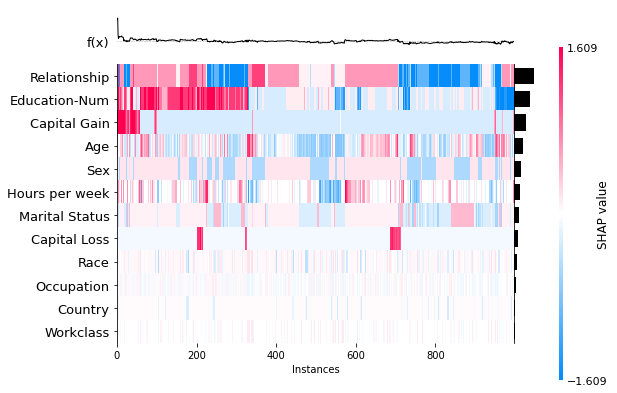

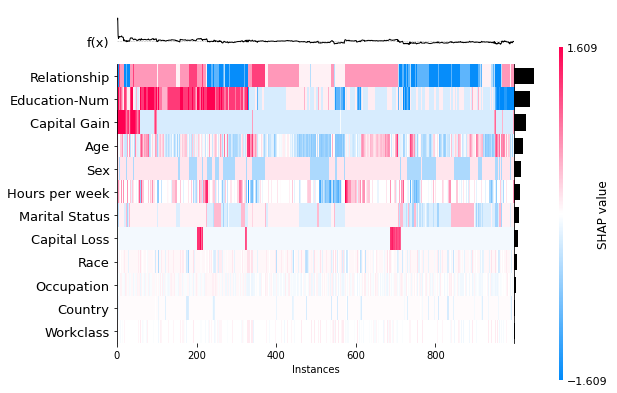

In [18]:
instance_order = explanation_b.shap_values.hclust()
feature_order = np.argsort(-explanation_b.shap_values.abs.mean(0).values)
for explanation in (explanation_a, explanation_b):
    shap.plots.heatmap(explanation.shap_values, instance_order=instance_order, feature_order=feature_order, max_display=len(feature_names))